## Ultimate Technologies Inc. Take-Home Challenge

### Part 1: Exploratory data analysis

- json file contains timestamps of user logins at specific locations. aggregate these login counts based on 15 minute intervals and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns
- report and illustrate important features of the demand such as daily cycles

In [1]:
import pandas as pd
import numpy as np
import json
from datetime import datetime, timedelta

In [2]:
with open('logins.json', 'r') as json_file:
    data = json.load(json_file)

In [3]:
login_counts = {}

In [4]:
def round_to_15_minutes(timestamp):
    return timestamp - timedelta(minutes=timestamp.minute % 15,
                                 seconds=timestamp.second,
                                 microseconds=timestamp.microsecond)

In [5]:
data['login_time']


['1970-01-01 20:13:18',
 '1970-01-01 20:16:10',
 '1970-01-01 20:16:37',
 '1970-01-01 20:16:36',
 '1970-01-01 20:26:21',
 '1970-01-01 20:21:41',
 '1970-01-01 20:12:16',
 '1970-01-01 20:35:47',
 '1970-01-01 20:35:38',
 '1970-01-01 20:47:52',
 '1970-01-01 20:26:05',
 '1970-01-01 20:31:03',
 '1970-01-01 20:34:46',
 '1970-01-01 20:36:34',
 '1970-01-01 20:39:25',
 '1970-01-01 20:40:37',
 '1970-01-01 20:34:58',
 '1970-01-01 20:43:59',
 '1970-01-01 20:47:46',
 '1970-01-01 20:46:34',
 '1970-01-01 20:56:07',
 '1970-01-01 20:49:12',
 '1970-01-01 20:59:06',
 '1970-01-01 20:59:59',
 '1970-01-01 21:15:01',
 '1970-01-01 21:09:24',
 '1970-01-01 21:19:24',
 '1970-01-01 21:20:53',
 '1970-01-01 21:29:19',
 '1970-01-01 21:58:05',
 '1970-01-01 21:51:51',
 '1970-01-01 21:59:40',
 '1970-01-01 22:08:34',
 '1970-01-01 22:02:51',
 '1970-01-01 21:58:32',
 '1970-01-01 22:02:31',
 '1970-01-01 22:05:32',
 '1970-01-01 22:02:46',
 '1970-01-01 22:10:28',
 '1970-01-01 22:11:58',
 '1970-01-01 22:01:05',
 '1970-01-01 22:

In [6]:
for login in data['login_time']:
    timestamp = datetime.strptime(login, '%Y-%m-%d %H:%M:%S')
    rounded_timestamp = round_to_15_minutes(timestamp)
    
    if rounded_timestamp not in login_counts:
        login_counts[rounded_timestamp] = 1
    else:
        login_counts[rounded_timestamp] += 1


In [7]:
for interval, count in login_counts.items():
    print(f"{interval.strftime('%Y-%m-%d %H:%M:%S')} - {interval + timedelta(minutes=15)}: {count} logins")

1970-01-01 20:00:00 - 1970-01-01 20:15:00: 2 logins
1970-01-01 20:15:00 - 1970-01-01 20:30:00: 6 logins
1970-01-01 20:30:00 - 1970-01-01 20:45:00: 9 logins
1970-01-01 20:45:00 - 1970-01-01 21:00:00: 7 logins
1970-01-01 21:15:00 - 1970-01-01 21:30:00: 4 logins
1970-01-01 21:00:00 - 1970-01-01 21:15:00: 1 logins
1970-01-01 21:45:00 - 1970-01-01 22:00:00: 4 logins
1970-01-01 22:00:00 - 1970-01-01 22:15:00: 9 logins
1970-01-01 22:15:00 - 1970-01-01 22:30:00: 8 logins
1970-01-01 22:30:00 - 1970-01-01 22:45:00: 1 logins
1970-01-01 23:00:00 - 1970-01-01 23:15:00: 16 logins
1970-01-01 22:45:00 - 1970-01-01 23:00:00: 3 logins
1970-01-01 23:15:00 - 1970-01-01 23:30:00: 13 logins
1970-01-01 23:30:00 - 1970-01-01 23:45:00: 14 logins
1970-01-01 23:45:00 - 1970-01-02 00:00:00: 15 logins
1970-01-02 00:00:00 - 1970-01-02 00:15:00: 10 logins
1970-01-02 00:15:00 - 1970-01-02 00:30:00: 18 logins
1970-01-02 00:30:00 - 1970-01-02 00:45:00: 12 logins
1970-01-02 00:45:00 - 1970-01-02 01:00:00: 13 logins
1970

1970-02-08 16:30:00 - 1970-02-08 16:45:00: 24 logins
1970-02-08 16:45:00 - 1970-02-08 17:00:00: 23 logins
1970-02-08 17:00:00 - 1970-02-08 17:15:00: 11 logins
1970-02-08 17:15:00 - 1970-02-08 17:30:00: 11 logins
1970-02-08 17:30:00 - 1970-02-08 17:45:00: 12 logins
1970-02-08 17:45:00 - 1970-02-08 18:00:00: 6 logins
1970-02-08 18:00:00 - 1970-02-08 18:15:00: 11 logins
1970-02-08 18:15:00 - 1970-02-08 18:30:00: 12 logins
1970-02-08 18:30:00 - 1970-02-08 18:45:00: 8 logins
1970-02-08 18:45:00 - 1970-02-08 19:00:00: 10 logins
1970-02-08 19:00:00 - 1970-02-08 19:15:00: 10 logins
1970-02-08 19:15:00 - 1970-02-08 19:30:00: 8 logins
1970-02-08 19:30:00 - 1970-02-08 19:45:00: 19 logins
1970-02-08 19:45:00 - 1970-02-08 20:00:00: 10 logins
1970-02-08 20:00:00 - 1970-02-08 20:15:00: 12 logins
1970-02-08 20:15:00 - 1970-02-08 20:30:00: 11 logins
1970-02-08 20:30:00 - 1970-02-08 20:45:00: 5 logins
1970-02-08 20:45:00 - 1970-02-08 21:00:00: 5 logins
1970-02-08 21:00:00 - 1970-02-08 21:15:00: 15 login

1970-03-21 04:45:00 - 1970-03-21 05:00:00: 42 logins
1970-03-21 05:00:00 - 1970-03-21 05:15:00: 33 logins
1970-03-21 05:15:00 - 1970-03-21 05:30:00: 25 logins
1970-03-21 05:30:00 - 1970-03-21 05:45:00: 10 logins
1970-03-21 05:45:00 - 1970-03-21 06:00:00: 18 logins
1970-03-21 06:00:00 - 1970-03-21 06:15:00: 8 logins
1970-03-21 06:15:00 - 1970-03-21 06:30:00: 4 logins
1970-03-21 06:30:00 - 1970-03-21 06:45:00: 7 logins
1970-03-21 06:45:00 - 1970-03-21 07:00:00: 5 logins
1970-03-21 07:00:00 - 1970-03-21 07:15:00: 4 logins
1970-03-21 07:15:00 - 1970-03-21 07:30:00: 4 logins
1970-03-21 07:30:00 - 1970-03-21 07:45:00: 3 logins
1970-03-21 07:45:00 - 1970-03-21 08:00:00: 2 logins
1970-03-21 08:00:00 - 1970-03-21 08:15:00: 1 logins
1970-03-21 08:15:00 - 1970-03-21 08:30:00: 3 logins
1970-03-21 08:30:00 - 1970-03-21 08:45:00: 3 logins
1970-03-21 08:45:00 - 1970-03-21 09:00:00: 1 logins
1970-03-21 09:00:00 - 1970-03-21 09:15:00: 2 logins
1970-03-21 09:30:00 - 1970-03-21 09:45:00: 1 logins
1970-03

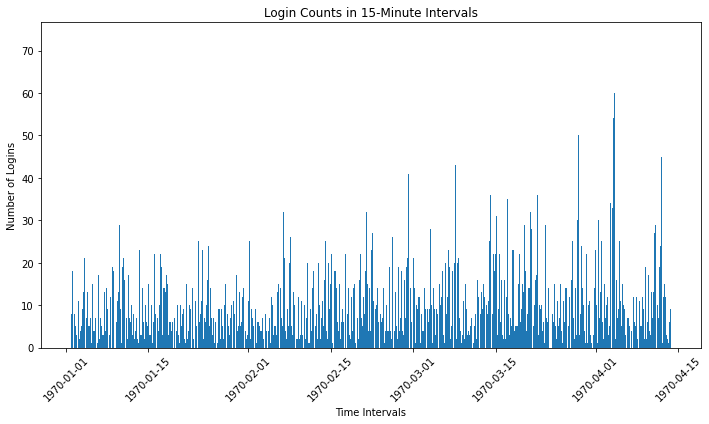

In [8]:
import matplotlib.pyplot as plt

intervals = list(login_counts.keys())
counts = list(login_counts.values())

plt.figure(figsize=(10,6))
plt.bar(intervals, counts, width=0.01, align='edge')
plt.xlabel('Time Intervals')
plt.ylabel('Number of Logins')
plt.title('Login Counts in 15-Minute Intervals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Part 2: Experiment and metrics design

1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

Answer: 
- I believe the key measure of success of this experiment in encouraging driver partners to serve both cities would be the financial impact and customer satisfaction. Distributing driver partners in both cities will increase cross-city trips and could lead to an overall higher revenue for the ride-sharing service due to increased activity all round. Additionally, customers will be happier with the availability of driver partners in both cities because of the convenience of easily finding a ride across the toll bridge especially at busy times. Happy customers will also lead to an increase in service usage, leading to an increase in revenue as well. 

2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on: 

    - a) how you will implement the experiment 
    - b) what statistical tests you will conduct to verify the significance of the observation 
    - c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.
   

Answer: 
- a) Based on my key measure of success, I will need to conduct an experiment that compares two datasets. The first dataset would need to have information on each rider, the number of trips the rider took monthly, the number of trips that were across the toll bridge monthly, the rider's rating of the service, Ultimate's total monthly revenue, and etc. The second dataset would be a dataset that contains the same information as the first dataset, but self-manipulated to have increased values for number of trips that were across the toll bridge monthly and the number of trips the rider took monthly. Then, I would compare the values of the rider's rating of the service and Ultimate's total monthly revenue between these two datasets. If these two values have increased between the two datasets, then there is a large chance our hypothesis is correct in that the proposed change would be effective in a real world setting where Ultimate Technologies Inc reimbursed the toll fees. 

- b) I would use supervised machine learning models because our probject would be centered around predicting association, not determining a class label. First, I would start by building a linear regression as the base model and analyze how successful my results were. Based off my analysis of this model, I would be able to choose a better model based on my results, like a neural network model. These models will be able to effectively determine if my continuous qualitative variables have a relationship with each other. 

- c) My performance metrics would be mean absolute error and mean squared error, and of course, paying close attention to the R^2 value as well. If I have a high enough R^2 value, I can assume there is some relationship between those particular variables. With this, I would analyze the mean absolute error and mean squared error. If these two values are low enough, that means my findings are supported, and I would be able to conclude that there is a lot of evidence supporting driver partners to conduct cross trips for the satisfaction of customers. Based on my findings, I could offer my conclusion that reimbursement of the toll fee significantly increases user satisfaction, which increases rider usage, or not. My conclusion would provide the extent to how confident I am in the result that I achieved. With my evidence, I could present my findings to the city operations teams through providing my technical modeling work, conducting a non-technical presentation of my results, and answering any questions about factors I might have missed or potential obstacles. 


### Part 3: Predictive modeling

#### Data cleaning

I removed all null values from the dataset and changed the date columns to datetime type instead of object types. I created a new column in the dataframe called 'retained_user,' representing 0 if the user is not considered retained and 1 if the user is considered retained by assigning 0 if the value in 'trips_in_first_30_days' column was 0. Any value above 0 in this column would consider a user as 'retained,' so I assigned the value of 1 in the new 'retained_user' column. Then, I calculated the fraction of the observed users who were retained. 

In [9]:
data = pd.read_json('ultimate_data_challenge.json')

In [10]:
data.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [11]:
data = data.dropna(subset=['avg_rating_of_driver', 'avg_rating_by_driver', 'phone'])

In [12]:
data.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [13]:
data.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [14]:
data.signup_date = pd.to_datetime(data.signup_date)
data.last_trip_date = pd.to_datetime(data.last_trip_date)

In [15]:
data.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000
mean,2.609675,4.601720,1.073822,8.898709,61.254897,5.460046,4.776446
std,4.059336,0.616104,0.198747,18.322061,34.813848,5.145174,0.404606
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,37.500000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.780000,5.000000
75%,3.000000,5.000000,1.070000,11.100000,100.000000,6.490000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,79.690000,5.000000


In [16]:
data['retained_user'] = 1

In [17]:
data.loc[data['trips_in_first_30_days'] == 0, 'retained_user'] = 0

Found fraction of the observed users who were retained:

In [18]:
(data['retained_user'].sum())/len(data.index)

0.7219447460489806

#### Exploratory Data Analysis

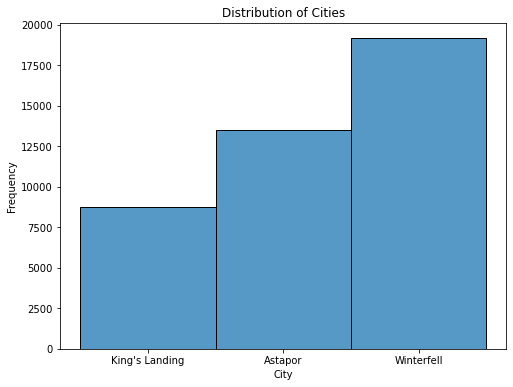

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of cities
plt.figure(figsize=(8, 6))
sns.histplot(data['city'], bins=20)
plt.title('Distribution of Cities')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.show()

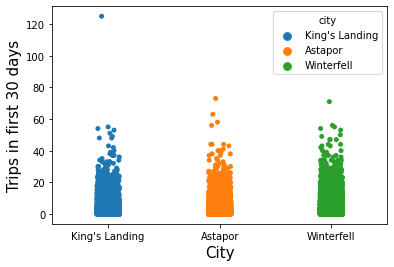

In [20]:
sns.stripplot(data=data, x="city", y="trips_in_first_30_days", hue="city")
plt.xlabel('City', fontsize=15)
plt.ylabel('Trips in first 30 days', fontsize=15)
plt.show()

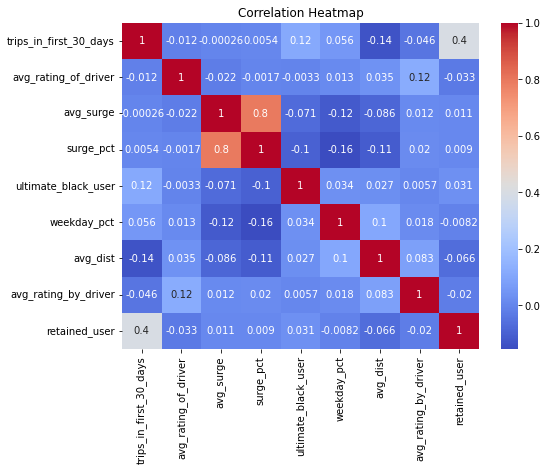

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

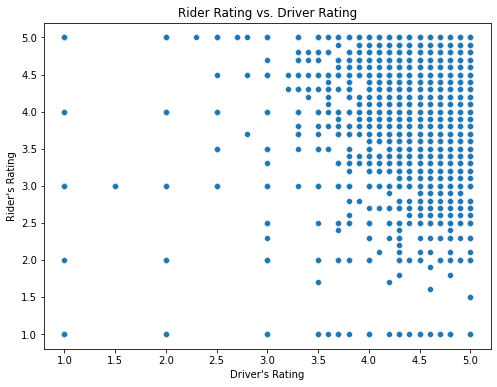

In [22]:
# Scatter plot of fare amount vs. rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='avg_rating_by_driver', y='avg_rating_of_driver', data=data)
plt.title('Rider Rating vs. Driver Rating')
plt.xlabel("Driver's Rating")
plt.ylabel("Rider's Rating")
plt.show()

In [23]:
data['signup_date']

0       2014-01-25
1       2014-01-29
2       2014-01-06
3       2014-01-10
4       2014-01-27
           ...    
49993   2014-01-03
49994   2014-01-03
49995   2014-01-25
49997   2014-01-31
49998   2014-01-14
Name: signup_date, Length: 41445, dtype: datetime64[ns]

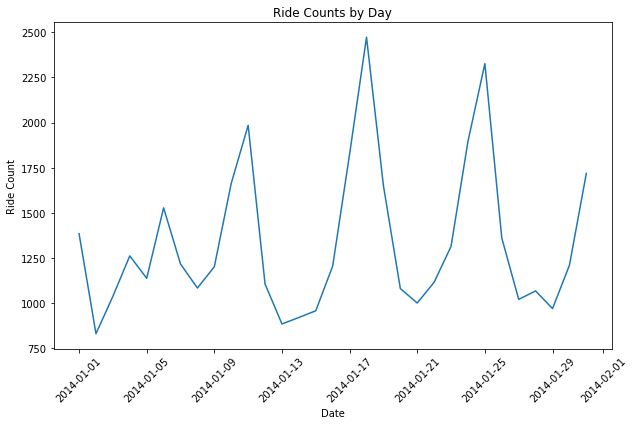

In [24]:
# Plot ride counts by day
plt.figure(figsize=(10, 6))
sns.lineplot(data=data.groupby(data['signup_date'].dt.date)['city'].count())
plt.title('Ride Counts by Day')
plt.xlabel('Date')
plt.ylabel('Ride Count')
plt.xticks(rotation=45)
plt.show()

#### Build Predictive Model

now build a predictive model to determine if a user will be active in their 6th month of their system 

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [26]:
data1 = data[['city', 'phone', 'ultimate_black_user']]

transformer = make_column_transformer((OneHotEncoder(), ['city', 'phone', 'ultimate_black_user']), remainder='passthrough')

transformed = transformer.fit_transform(data1)
transformed_data = pd.DataFrame(transformed, columns = transformer.get_feature_names_out())
df = pd.concat([data, transformed_data], axis=1)

In [27]:
df = df.drop(columns=['city', 'phone', 'ultimate_black_user', 'trips_in_first_30_days'])

In [28]:
df= df.dropna()

In [29]:
df.dtypes

signup_date                                 datetime64[ns]
avg_rating_of_driver                               float64
avg_surge                                          float64
last_trip_date                              datetime64[ns]
surge_pct                                          float64
weekday_pct                                        float64
avg_dist                                           float64
avg_rating_by_driver                               float64
retained_user                                      float64
onehotencoder__city_Astapor                        float64
onehotencoder__city_King's Landing                 float64
onehotencoder__city_Winterfell                     float64
onehotencoder__phone_Android                       float64
onehotencoder__phone_iPhone                        float64
onehotencoder__ultimate_black_user_False           float64
onehotencoder__ultimate_black_user_True            float64
dtype: object

In [30]:
cols = ['surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver', 'onehotencoder__city_Astapor', "onehotencoder__city_King's Landing", 'onehotencoder__city_Winterfell', 'onehotencoder__phone_Android', 'onehotencoder__phone_iPhone', 'onehotencoder__ultimate_black_user_False', 'onehotencoder__ultimate_black_user_True', 'avg_surge', 'avg_rating_of_driver']
for col in cols:
    df[col] = df[col].astype(int)

In [36]:
columns = ['avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver', 'onehotencoder__city_Astapor', "onehotencoder__city_King's Landing", 'onehotencoder__city_Winterfell', 'onehotencoder__phone_Android', 'onehotencoder__phone_iPhone', 'onehotencoder__ultimate_black_user_False', 'onehotencoder__ultimate_black_user_True']
X = df[columns]
y = df.retained_user

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

After one-hot encoding my variables for city type, phone type, and if they were an ultimate black user or not, I split my dataset into training and testing subsets.

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((27493, 13), (6874, 13), (27493,), (6874,))

The first model I used was Logistic Regression because I wanted a simple base model first, and see how it performed.

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear', random_state=0)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [40]:
matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
lr_accuracy = accuracy_score(y_test, y_pred)
print(matrix)
print(report)
print('Accuracy Score: ', lr_accuracy)

[[   0 1910]
 [   9 4955]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1910
         1.0       0.72      1.00      0.84      4964

    accuracy                           0.72      6874
   macro avg       0.36      0.50      0.42      6874
weighted avg       0.52      0.72      0.60      6874

Accuracy Score:  0.720832121035787


In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [44]:
report = classification_report(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, y_pred)
print(report)
print('Accuracy Score: ', rf_accuracy)

              precision    recall  f1-score   support

         0.0       0.34      0.19      0.25      1910
         1.0       0.73      0.86      0.79      4964

    accuracy                           0.67      6874
   macro avg       0.54      0.53      0.52      6874
weighted avg       0.63      0.67      0.64      6874

Accuracy Score:  0.6738434681408205


I had 0 precision and recall scores for the non-retained users in the logistic regression model and very low scores for the random forest model still. Therefore, I used RandomOverSampler to balance my target subsets. 

In [45]:
from imblearn.over_sampling import RandomOverSampler 
randomsample = RandomOverSampler()
X_new, y_new = randomsample.fit_resample(X, y)

In [46]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.2, random_state=100, stratify=y_new)


In [47]:
lr = LogisticRegression(solver = 'liblinear', random_state=0)
lr.fit(X_new_train, y_new_train)
y_new_pred = lr.predict(X_new_test)

In [48]:
report = classification_report(y_new_test, y_new_pred)
rf_accuracy = accuracy_score(y_new_test, y_new_pred)
print(report)
print('Accuracy Score: ', rf_accuracy)

              precision    recall  f1-score   support

         0.0       0.59      0.63      0.61      4964
         1.0       0.60      0.56      0.58      4964

    accuracy                           0.59      9928
   macro avg       0.59      0.59      0.59      9928
weighted avg       0.59      0.59      0.59      9928

Accuracy Score:  0.5938759065269944


In [49]:
rf = RandomForestClassifier()
rf.fit(X_new_train, y_new_train)
y_new_pred = rf.predict(X_new_test)

In [50]:
report = classification_report(y_new_test, y_new_pred)
rf_accuracy = accuracy_score(y_new_test, y_new_pred)
print(report)
print('Accuracy Score: ', rf_accuracy)

              precision    recall  f1-score   support

         0.0       0.69      0.85      0.76      4964
         1.0       0.81      0.63      0.71      4964

    accuracy                           0.74      9928
   macro avg       0.75      0.74      0.73      9928
weighted avg       0.75      0.74      0.73      9928

Accuracy Score:  0.7381144238517324


After fitting my models to the new balanced subsets, I received a lot better results and decided to go with the Random Forest model. I then calculated the significant feature importances for each of these features below.

In [52]:
features = X_new
importances = list(rf.feature_importances_)
imp = np.sort(importances)
tab=pd.DataFrame(list(zip(X_new,imp)),columns =['Features', 'Importance scores']) 
print(tab)

                                    Features  Importance scores
0                       avg_rating_of_driver           0.006120
1                                  avg_surge           0.008675
2                                  surge_pct           0.008697
3                                weekday_pct           0.008773
4                                   avg_dist           0.008986
5                       avg_rating_by_driver           0.010368
6                onehotencoder__city_Astapor           0.011449
7         onehotencoder__city_King's Landing           0.011490
8             onehotencoder__city_Winterfell           0.062936
9               onehotencoder__phone_Android           0.067302
10               onehotencoder__phone_iPhone           0.163197
11  onehotencoder__ultimate_black_user_False           0.298964
12   onehotencoder__ultimate_black_user_True           0.333043


As you can see, the most predictive in determining if a user will be retained in 6 months depends on the ultimate_black_user column. I can conclude with a model accuracy score of 0.74, that if the user took an ultimate Black in their first 30 days, this shows a huge implication that they will be defined as a retained user.